In [1]:
#importing required libraries
import pandas as pd
df=pd.read_csv("farmar.csv")
import re
import nltk
#nltk.download()
#nltk.download_shell()
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
#To import the dataset
df=pd.read_csv("farmar.csv")
df.head()

,Unnamed: 0,Tweet
0,0,DYK that 80% of all food producers in El Salva...
1,1,@MuditSh13791339 @TruthWins476 @KanganaTeam No...
2,2,@BJP4India getting message from the farmers @n...
3,3,Contempt against the U P Chief Minister or the...
4,4,All anti national channels are showing farmer...


In [4]:
tweet_data_list=[]
tweet_data_text=''
for idx, row in df.iterrows():
    tweet_data_list.append(row['Tweet'])
    tweet_data_text=tweet_data_text+row['Tweet']+'\n'
  
tweet_data_text=tweet_data_text.strip('\n')

In [6]:
#data cleaning
 
import re
# from nltk.stem import PorterStemmer
# import nltk
# nltk.download('stopwords')
corpus = []
 
for tweet in tweet_data_list:
  #print(tweet_data_list)
  #keeping only di
  #data1 = re.sub('[^a-zA-Z0-9 ]','',tweet)
  #putting all the letters of review into lowercase
  data1 = tweet.lower()
  #print(data1)
  #data1 = ' '.join(re.sub("(\w+:\/\/\S+)", "", tweet).split()) #url
  data2 = re.sub("(\w+:\/\/\S+)", "", data1)
  #removing non significant words using stopwords
  #data1=data1.split()
  #removing punctuation
  #data1 = ' '.join(re.sub("[\.\,\!\?\:\;\-\=\#\@]", "", data1).split()) #punctuation
  data3 = re.sub("[\.\,\!\?\:\;\-\=]", "", data2) #punctuation
  
    
  data4 = re.sub('\#[a-z0-9A-Z]+|\@[a-z0-9A-Z]+','',data3) #@ #
  data5 = re.sub('[^a-zA-Z ]','',data4)

  data6=data5.split()
  #ps = PorterStemmer()
  #stemming    
  #data2 = [ps.stem(word) for word in data1  if not word in set(stopwords.words('english'))]
#lemmatization
  lem = WordNetLemmatizer()

  data_f = [lem.lemmatize(word) for word in data6  if not word in set(stopwords.words('english'))]

  #back to string
#   print(data2)
  data_final = ' '.join(data_f).strip()
  corpus.append(data_final)
 
#print('\noutput---\n',corpus)
cleaned_tweet=pd.DataFrame(corpus,columns=['Tweet'])

In [7]:
#To get the clean tweet after cleaning the Tweet
cleaned_tweet.head()

,Tweet
0,dyk food producer el salvador smallholder farm...
1,hard feeling brother lol corona ke time mein b...
2,getting message farmer
3,contempt u p chief minister government abusing...
4,anti national channel showing farmer protestin...


In [22]:
# sentiment analysis


sentences = corpus
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    # polarity_scores method of SentimentIntensityAnalyzer
    # oject gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)

    #print("Overall sentiment dictionary is : ", sentiment_dict)
    #print("sentence was rated as ", sentiment_dict['neg'] * 100, "% Negative")
    #print("sentence was rated as ", sentiment_dict['neu'] * 100, "% Neutral")
    #print("sentence was rated as ", sentiment_dict['pos'] * 100, "% Positive")

    #print("Sentence Overall Rated As", end=" ")

    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05:
        pass
        #print("Positive")

    elif sentiment_dict['compound'] <-0.05:
        pass
        #print("Negative")

    else:
        pass
        #print("Neutral")
        
    return sentiment_dict['neg'],sentiment_dict['neu'],sentiment_dict['pos'],sentiment_dict['compound']
#type(corpus)

overall_neg = 0
overall_neu = 0
overall_pos = 0

positive=[]
negative=[]
neutral=[]



for i in range(len(sentences)):
    neg, neu, pos,compound = sentiment_scores(sentences[i])
    if compound >= 0.05:
        overall_pos +=1
        positive.append(sentences[i])
        

    elif compound <-0.05:
        overall_neg +=1
        negative.append(sentences[i])

    else:
        overall_neu +=1
        neutral.append(sentences[i])
    

#frequency of positive neg and neutral reviews

overall_neg_num = overall_neg
overall_neu_num = overall_neu
overall_pos_num = overall_pos



#print(overall_neg_num)
#print(overall_neu_num)
#print(overall_pos_num)


In [ ]:
#neg:(15,26)
#neutral:(55,32)
#pos:(30,40)

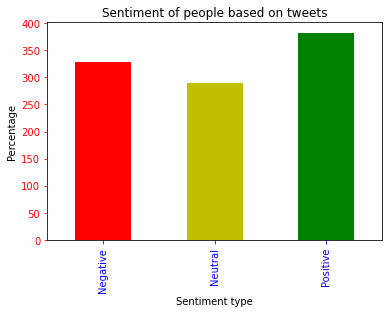

In [17]:
#Plotting it
import pandas as pd
import matplotlib.pyplot as plt

s = pd.Series(
    [overall_neg_num, overall_neu_num,overall_pos_num],
    index = ["Negative", "Neutral", "Positive"])

#Set descriptions:
plt.title("Sentiment of people based on tweets")
plt.ylabel('Percentage')
plt.xlabel('Sentiment type')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

#Plot the data:
my_colors = ['r', 'y', 'g']
s.plot(kind='bar',color=my_colors)
#plt.savefig('public_sentiment.png',type='png',dpi=1000)
plt.show()

Using Vader Sentiment percentage of negative, neutral and positive tweets
were calculated. From the data 30% of tweets can be said to be of negative
nature, 28% tweets can be said are neutral and 42% can be said to be
positive.

In [ ]:
sentences

In [8]:
#!pip install --user worldcloud
from wordcloud import WordCloud

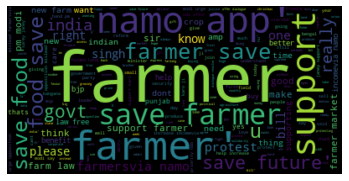

In [9]:
#text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(positive))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Analysing the tweets some most used words while describing this issue has
been taken together to make a word cloud.


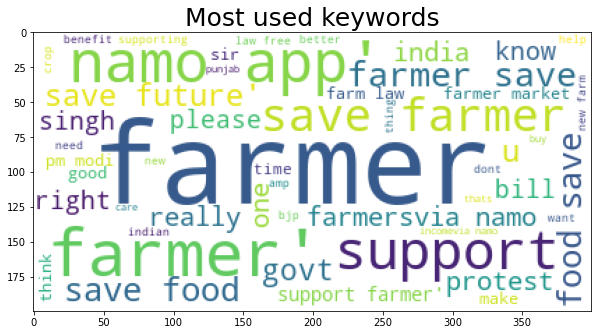

In [10]:
wc = WordCloud(max_words = 50, background_color = 'white').generate(str(positive))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.title('Most used keywords', fontsize = 25)
plt.show()

As we can see, farmer, given chance, modi, support, please, purchase, farm
is some of the most used positive words by people.


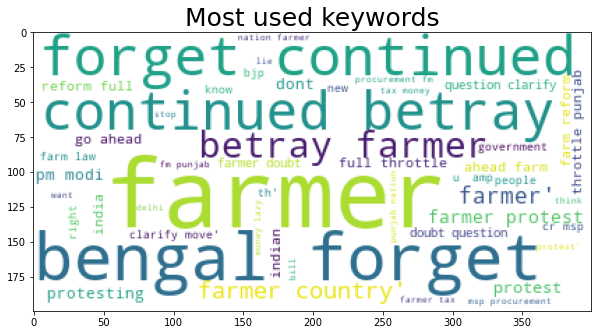

In [11]:
wc = WordCloud(max_words = 50, background_color = 'white').generate(str(negative))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.title('Most used keywords', fontsize = 25)
plt.show()

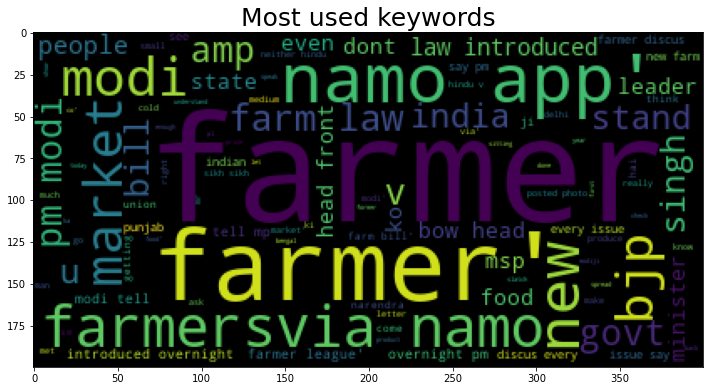

In [12]:
wc = WordCloud(max_words = 100).generate(str(neutral))
plt.figure(figsize=(12,10))
plt.imshow(wc)
plt.title('Most used keywords', fontsize = 25)
plt.show()

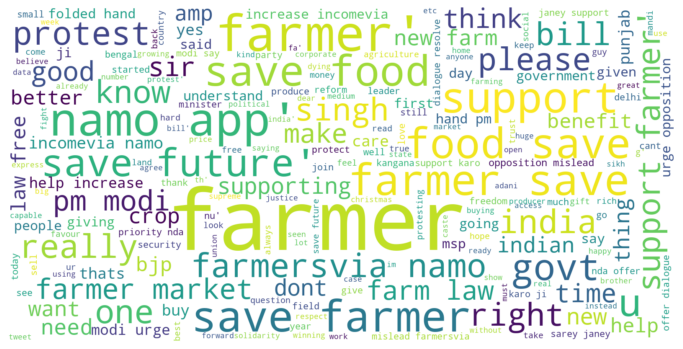

In [13]:


wordcloud = WordCloud(width=1600, height=800,max_font_size=200,background_color = 'white').generate(str(positive))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()